In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# (1) Apriori

In [ ]:
df = pd.read_excel("dataset_market_basket.xlsx",sheet_name="dataset_market_basket")

df

,Whole Milk,Pastry,Salty Snack,Sausage,semi-finished bread,Yougurt,Soda,pickled vegetables,canned beer,misc. beverages,...,sugar,butter milk,specialty chocolate,white bread,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.sum()

Whole Milk             5
Pastry                 1
Salty Snack            1
Sausage                4
semi-finished bread    1
Yougurt                1
Soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
white bread            1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [ ]:
from itertools import permutations

rules = list(permutations(df.columns, 2))
rules

[('Whole Milk', 'Pastry'),
 ('Whole Milk', 'Salty Snack'),
 ('Whole Milk', 'Sausage'),
 ('Whole Milk', 'semi-finished bread'),
 ('Whole Milk', 'Yougurt'),
 ('Whole Milk', 'Soda'),
 ('Whole Milk', 'pickled vegetables'),
 ('Whole Milk', 'canned beer'),
 ('Whole Milk', 'misc. beverages'),
 ('Whole Milk', 'hygiene articles'),
 ('Whole Milk', 'rolls/buns'),
 ('Whole Milk', 'frankfurter'),
 ('Whole Milk', 'whipped/sour cream'),
 ('Whole Milk', 'curd'),
 ('Whole Milk', 'beef'),
 ('Whole Milk', 'butter'),
 ('Whole Milk', 'frozen vegetables'),
 ('Whole Milk', 'other vegetables'),
 ('Whole Milk', 'tropical fruit'),
 ('Whole Milk', 'sugar'),
 ('Whole Milk', 'butter milk'),
 ('Whole Milk', 'specialty chocolate'),
 ('Whole Milk', 'white bread'),
 ('Whole Milk', 'frozen meals'),
 ('Whole Milk', 'dental care'),
 ('Whole Milk', 'root vegetables'),
 ('Whole Milk', 'detergent'),
 ('Whole Milk', 'dish cleaner'),
 ('Whole Milk', 'cling film/bags'),
 ('Pastry', 'Whole Milk'),
 ('Pastry', 'Salty Snack'),
 (

In [ ]:
new_rules = []
for rule in rules:
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) > 0:
    new_rules.append(rule)

new_rules

[('Whole Milk', 'Pastry'),
 ('Whole Milk', 'Salty Snack'),
 ('Whole Milk', 'Sausage'),
 ('Whole Milk', 'semi-finished bread'),
 ('Whole Milk', 'Yougurt'),
 ('Whole Milk', 'Soda'),
 ('Whole Milk', 'rolls/buns'),
 ('Whole Milk', 'butter'),
 ('Pastry', 'Whole Milk'),
 ('Pastry', 'Salty Snack'),
 ('Salty Snack', 'Whole Milk'),
 ('Salty Snack', 'Pastry'),
 ('Sausage', 'Whole Milk'),
 ('Sausage', 'semi-finished bread'),
 ('Sausage', 'Yougurt'),
 ('Sausage', 'hygiene articles'),
 ('Sausage', 'rolls/buns'),
 ('semi-finished bread', 'Whole Milk'),
 ('semi-finished bread', 'Sausage'),
 ('semi-finished bread', 'Yougurt'),
 ('Yougurt', 'Whole Milk'),
 ('Yougurt', 'Sausage'),
 ('Yougurt', 'semi-finished bread'),
 ('Soda', 'Whole Milk'),
 ('Soda', 'pickled vegetables'),
 ('Soda', 'frankfurter'),
 ('Soda', 'whipped/sour cream'),
 ('pickled vegetables', 'Soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'Sausage'),
 ('rolls/buns', 'Whole Milk'),
 (

In [ ]:
count = {}
for rule in new_rules:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  count[str(rule)] = banyak_data

count

{"('Whole Milk', 'Pastry')": 1,
 "('Whole Milk', 'Salty Snack')": 1,
 "('Whole Milk', 'Sausage')": 2,
 "('Whole Milk', 'semi-finished bread')": 1,
 "('Whole Milk', 'Yougurt')": 1,
 "('Whole Milk', 'Soda')": 1,
 "('Whole Milk', 'rolls/buns')": 1,
 "('Whole Milk', 'butter')": 1,
 "('Pastry', 'Whole Milk')": 1,
 "('Pastry', 'Salty Snack')": 1,
 "('Salty Snack', 'Whole Milk')": 1,
 "('Salty Snack', 'Pastry')": 1,
 "('Sausage', 'Whole Milk')": 2,
 "('Sausage', 'semi-finished bread')": 1,
 "('Sausage', 'Yougurt')": 1,
 "('Sausage', 'hygiene articles')": 1,
 "('Sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'Whole Milk')": 1,
 "('semi-finished bread', 'Sausage')": 1,
 "('semi-finished bread', 'Yougurt')": 1,
 "('Yougurt', 'Whole Milk')": 1,
 "('Yougurt', 'Sausage')": 1,
 "('Yougurt', 'semi-finished bread')": 1,
 "('Soda', 'Whole Milk')": 1,
 "('Soda', 'pickled vegetables')": 1,
 "('Soda', 'frankfurter')": 1,
 "('Soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'Soda')": 1,
 

In [ ]:
for item,ab in count.items():
  print(f"{item} | Nilai Support = {ab/len(df)*100}%")

('Whole Milk', 'Pastry') | Nilai Support = 5.263157894736842%
('Whole Milk', 'Salty Snack') | Nilai Support = 5.263157894736842%
('Whole Milk', 'Sausage') | Nilai Support = 10.526315789473683%
('Whole Milk', 'semi-finished bread') | Nilai Support = 5.263157894736842%
('Whole Milk', 'Yougurt') | Nilai Support = 5.263157894736842%
('Whole Milk', 'Soda') | Nilai Support = 5.263157894736842%
('Whole Milk', 'rolls/buns') | Nilai Support = 5.263157894736842%
('Whole Milk', 'butter') | Nilai Support = 5.263157894736842%
('Pastry', 'Whole Milk') | Nilai Support = 5.263157894736842%
('Pastry', 'Salty Snack') | Nilai Support = 5.263157894736842%
('Salty Snack', 'Whole Milk') | Nilai Support = 5.263157894736842%
('Salty Snack', 'Pastry') | Nilai Support = 5.263157894736842%
('Sausage', 'Whole Milk') | Nilai Support = 10.526315789473683%
('Sausage', 'semi-finished bread') | Nilai Support = 5.263157894736842%
('Sausage', 'Yougurt') | Nilai Support = 5.263157894736842%
('Sausage', 'hygiene articles'

In [ ]:
for item,ab in count.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} | Nilai Confidence = {ab/df[i[0]].sum()*100}%")

Whole Milk->Pastry | Nilai Confidence = 20.0%
Whole Milk->Salty Snack | Nilai Confidence = 20.0%
Whole Milk->Sausage | Nilai Confidence = 40.0%
Whole Milk->semi-finished bread | Nilai Confidence = 20.0%
Whole Milk->Yougurt | Nilai Confidence = 20.0%
Whole Milk->Soda | Nilai Confidence = 20.0%
Whole Milk->rolls/buns | Nilai Confidence = 20.0%
Whole Milk->butter | Nilai Confidence = 20.0%
Pastry->Whole Milk | Nilai Confidence = 100.0%
Pastry->Salty Snack | Nilai Confidence = 100.0%
Salty Snack->Whole Milk | Nilai Confidence = 100.0%
Salty Snack->Pastry | Nilai Confidence = 100.0%
Sausage->Whole Milk | Nilai Confidence = 50.0%
Sausage->semi-finished bread | Nilai Confidence = 25.0%
Sausage->Yougurt | Nilai Confidence = 25.0%
Sausage->hygiene articles | Nilai Confidence = 25.0%
Sausage->rolls/buns | Nilai Confidence = 50.0%
semi-finished bread->Whole Milk | Nilai Confidence = 100.0%
semi-finished bread->Sausage | Nilai Confidence = 100.0%
semi-finished bread->Yougurt | Nilai Confidence = 1

# (2) KNN

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

In [ ]:
df = pd.read_csv("deteksi_uang_palsu.csv")

df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


## Membuat Tabel Jarak

In [ ]:
# import library numpy
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df['distance'] = np.sqrt(
    (df['diagonal'] - new_data['diagonal'].values[0])**2
    + (df['height_left'] - new_data['height_left'].values[0])**2
    + (df['height_right'] - new_data['height_right'].values[0])**2
    + (df['margin_low'] - new_data['margin_low'].values[0])**2
    + (df['margin_up'] - new_data['margin_up'].values[0])**2
    + (df['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


## Menambahkan Kolom Jarak

In [ ]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

## Mengurutkan Data (terkecil ke terbesar)

In [ ]:
# Mengurutkan data dari kecil ke besar
sorted_data = df.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df)))

# Menentukan data terdekat
data_terdekat = sorted_data.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


## Menentukan Hasil Prediksi Berdasarkan Tabel Terbanyak

In [ ]:
print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df.drop(columns=['is_genuine','distance'],axis=1)
y_train = df['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

Nama : Nur Inayah Al-'Azhimah

NIM : 2109116017

## Business Understanding

Tema : Ritel

Dataset : Fashion Clothing Product

---

Dataset ini merupakan Fashion Clothing Product Catalog dari Myntra.com. Myntra adalah perusahaan e-commerse besar India  yang berkantor pusat di Bengaluru, Karnataka, India Perusahaan tersebut didirikan pada tahun 2007 untuk menjual barang hadiah yang dikustomisasi. Pada Mei 2014, Myntra.com diakuisisi oleh Flipkart.

Tujuan penggunaan dataset ini adalah untuk mengetahui lebih dalam mengenai clothing product yang ada di Myntra seperti nama produk, nama brand, deskripsi, hingga harganya.



## Data Understanding

Dataset : https://www.kaggle.com/datasets/shivamb/fashion-clothing-products-catalog

In [ ]:
df = pd.read_csv("myntra_products_catalog.csv")

df

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White
...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN


In [ ]:
df.describe()

,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


**Penjelasan Kolom**

1. Kolom 'ProductID' merupakan kolom terkait unique value dari tiap produk.
2. Kolom 'ProductName' merupakan kolom terkait nama dari setiap produk.
3. Kolom 'ProductBrand' merupakan kolom terkait nama brand dari setiap produk.
4. Kolom 'Gender' merupakan kolom terkait siapa yg menggunakan produk berdasarkan gendernya.
5. Kolom 'Price (INR)' merupakan kolom terkait harga tiap produk dalam mata uang INR (rupee India).
6. Kolom 'NumImages' merupakan kolom terkait nomor gambar produk yang tersedia.
7. Kolom 'Description' merupakan kolom terkait deskripsi dari tiap produk.
8. Kolom 'PrimaryColor' merupakan kolom terkait kategori primary color dari tiap produk.





### Visualisasi Comparison

<Axes: xlabel='Gender', ylabel='count'>

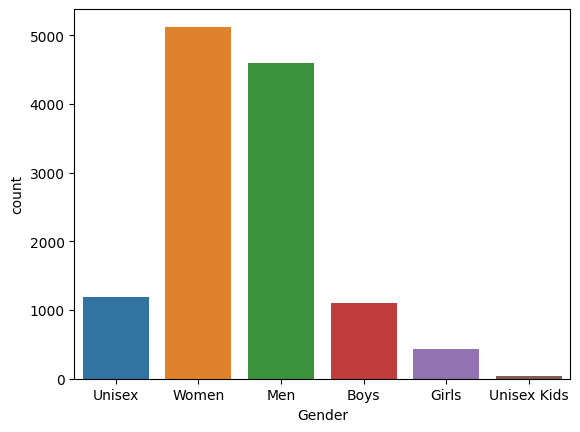

In [ ]:
# Menampilkan jumlah produk berdasarkan gender
sns.countplot(data=df, x="Gender")

<Axes: xlabel='count', ylabel='PrimaryColor'>

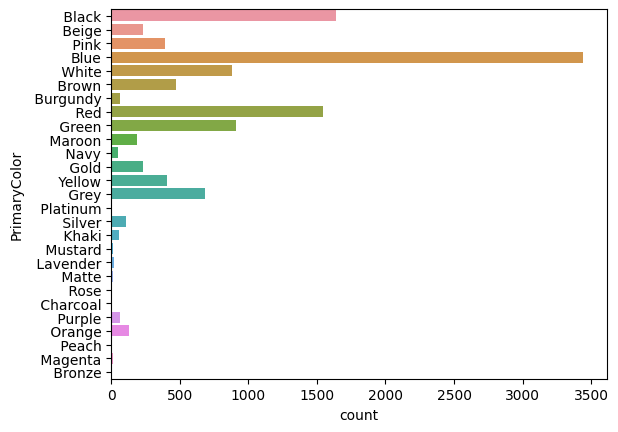

In [ ]:
# Menampilkan banyaknya produk berdasarkan primary color
sns.countplot(data=df, y="PrimaryColor")

### Visualisasi Distribution

<Axes: xlabel='Gender', ylabel='Count'>

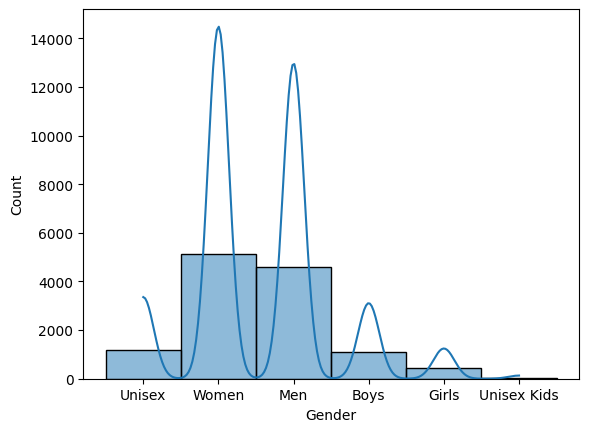

In [ ]:
# Menampilkan jumlah produk berdasarkan gender
sns.histplot(data=df, x="Gender", kde=True)

<Axes: xlabel='Count', ylabel='PrimaryColor'>

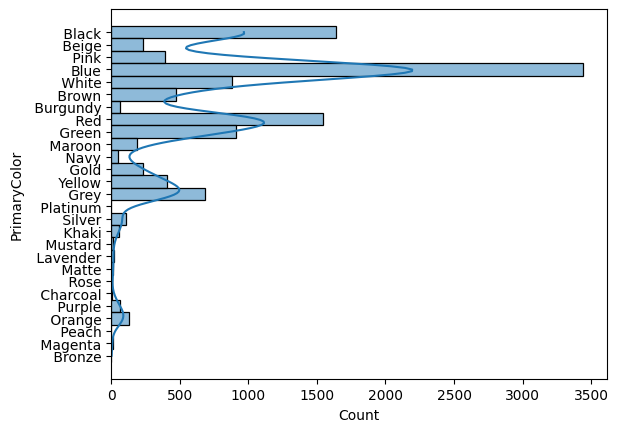

In [ ]:
# Menampilkan jumlah produk berdasarkan primary color
sns.histplot(data=df, y="PrimaryColor", kde=True)

<Axes: xlabel='NumImages'>

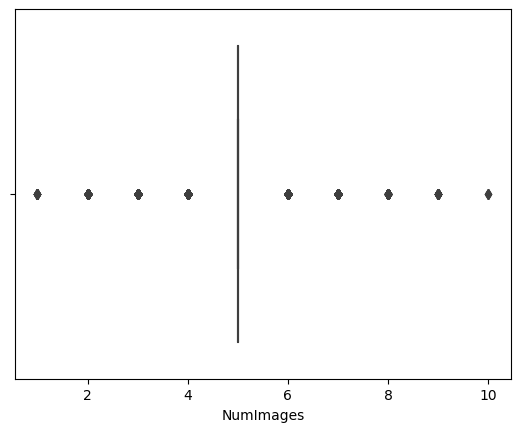

In [ ]:
# Menampilkan produk berdasarkan gambar produk yg dimiliki
sns.boxplot(data=df, x="NumImages")

### Visualisasi Relationship

<Axes: xlabel='ProductBrand', ylabel='ProductName'>

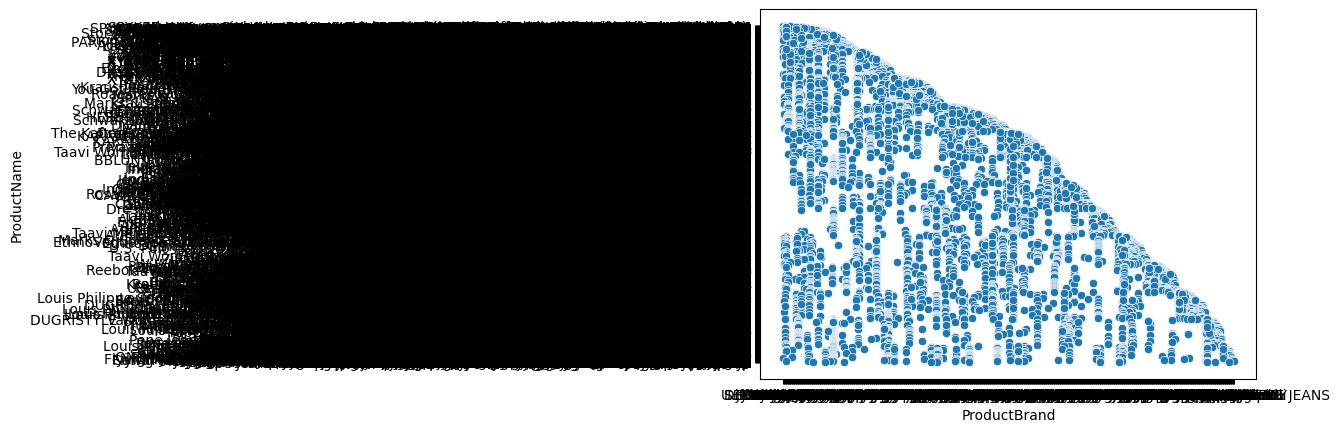

In [48]:
# Menampilkan hubungan antara nama produk dan nama brand
sns.scatterplot(data=df, x="ProductBrand", y="ProductName")

<Axes: xlabel='Gender', ylabel='PrimaryColor'>

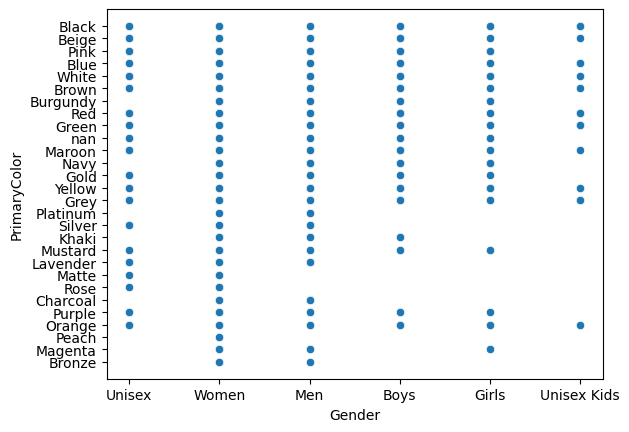

In [49]:
# Menampilkan hubungan antara gender dengan primary color
sns.scatterplot(data=df, x="Gender", y="PrimaryColor")

### Visualisasi Composition

In [28]:
# Menampilkan jumlah produk berdasarkan gender
px.pie(df,names="Gender")

In [29]:
# Menampilkan jumlah produk berdasarkan primary color
px.pie(df,names="PrimaryColor")

<Axes: >

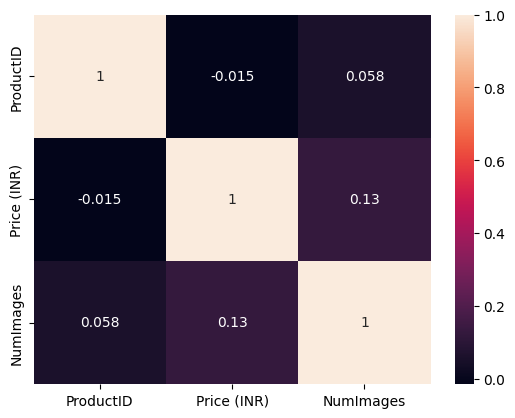

In [30]:
sns.heatmap(df.corr(), annot=True)

## Data Preparation

In [31]:
df.isna()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
12486,False,False,False,False,False,False,False,False
12487,False,False,False,False,False,False,False,False
12488,False,False,False,False,False,False,False,False
12489,False,False,False,False,False,False,False,True


In [32]:
df.isna().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

In [44]:
vc = pd.get_dummies(df)
vc

In [46]:
from sklearn.model_selection import train_test_split
x = df.drop('NumImages',axis=1)
y = df['NumImages']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)

       ProductID                                        ProductName            ProductBrand  Gender  Price (INR)                                        Description PrimaryColor
6498    10155747  Indian Terrain Men Green & White Slim Fit Chec...          Indian Terrain     Men          879  Green and White checked casual shirt, has a sp...        Green
7811    10185805       URBANE Women Blue & Black Woven Design Pumps                  URBANE   Women         1919  A pair of blue & black peep toe pumps, has reg...         Blue
3509    10065121  Skult By Shahid Kapoor Men Black Solid Straigh...  SKULT by Shahid Kapoor     Men          999  Black solid straight-fit track pants with camo...        Black
12077   10262137  Puma Men Blue Textile Carson 2 Nature Knit Mid...                    Puma     Men         2249  Product Story Inspired by nature, the Carson 2...         Blue
2268    10038931  Kraus Jeans Women Olive Green Solid Regular Fi...             Kraus Jeans   Women          647  O

In [38]:
df["PrimaryColor"] = df["PrimaryColor"].apply(lambda x : str(x).strip())
vc = df['PrimaryColor'].value_counts().to_frame().reset_index().head(15)

fig = px.bar(x=list(vc['PrimaryColor'])[::-1], y=list(vc['index'])[::-1])
fig.update_layout(plot_bgcolor="#fff", title="Most Popular Colors", yaxis_title="", xaxis_title="Counts")
fig.show()

In [39]:
vc = df["Gender"].value_counts().to_frame().reset_index()
fig = px.pie(vc, values='Gender', names='index', title='Gender Distribution')
fig.show()

In [40]:
df["ProductBrand"] = df["ProductBrand"].apply(lambda x : str(x).strip())
vc = df['ProductBrand'].value_counts().to_frame().reset_index().head(15)

fig = px.bar(x=list(vc['ProductBrand'])[::-1], y=list(vc['index'])[::-1])
fig.update_layout(plot_bgcolor="#fff", title="Most Popular Brands", yaxis_title="", xaxis_title="Counts")
fig.show()

In [41]:
fig = px.histogram(x=df[df['Price (INR)'] < 10000]["Price (INR)"])
fig.update_layout(plot_bgcolor="#fff", title="Price Distribution", yaxis_title="", xaxis_title="Counts")
fig.show()